In [1]:
import nltk
import pandas as pd
import numpy as np

### importing train/test data

In [22]:
train_data = pd.read_csv('cn_train.csv')
test_data = pd.read_csv('cn_test.csv')
train_data.isnull().sum()
train_data.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [18]:
test_data.isnull().sum()

tweet_id                     0
airline                      0
airline_sentiment_gold    3651
name                         0
negativereason_gold       3652
retweet_count                0
text                         0
tweet_coord               3417
tweet_created                0
tweet_location            1183
user_timezone             1243
dtype: int64

### cleaning data

In [23]:
category = train_data['airline_sentiment']
features = ('text')
x_train = train_data[features]
x_test = test_data[features]

### using count vectorizer 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.ensemble import RandomForestClassifier as RVC
from sklearn.model_selection import train_test_split as tts

In [35]:
cv = CV()
x_train_features = cv.fit_transform(x_train)
x_test_features = cv.transform(x_test)

In [45]:
x_test_features 

<3660x12758 sparse matrix of type '<class 'numpy.int64'>'
	with 56293 stored elements in Compressed Sparse Row format>

In [40]:
train_x,test_x,train_y,test_y = tts(x_train_features,category)

In [41]:
from matplotlib import pyplot as pplot

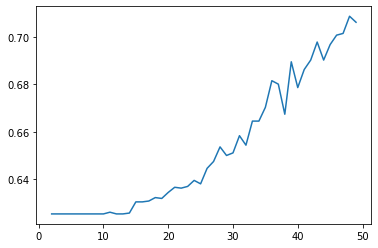

In [42]:
x_axis = []
y_axis = []
for i in range(2,50):
    algo = RVC(max_depth = i)
    algo.fit(train_x,train_y)
    sc = algo.score(test_x,test_y)
    y_axis.append(sc)
    x_axis.append(i)

pplot.plot(x_axis,y_axis)

In [43]:
algo = RVC(max_depth = 49)
algo.fit(x_train_features,category)
predictions = algo.predict(x_test_features)

In [44]:
ans = pd.DataFrame(predictions)
ans.to_csv('pred.csv',index = False)